In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataDirList = ['archive/GarbageClassification']
# dataDirList = ['/content/drive/MyDrive/archive/Garbage classification/Garbage classification']

selectedClasses = ['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']

In [4]:
imgPaths = []
labels = []
for dataDir in dataDirList:
    for className in os.listdir(dataDir):
        if className in selectedClasses :
            classPath = os.path.join(dataDir,className)
            for img in os.listdir(classPath):
                imgPath = os.path.join(classPath,img)
                imgPaths.append(imgPath)
                labels.append(className)

# Convert the 2 lists to dataframe to easy use
df = pd.DataFrame({
    'imgPath':imgPaths,
    'label':labels
})

df = df.sample(frac=1).reset_index(drop=True)            # Shuffle

df

,imgPath,label
0,/content/drive/MyDrive/archive/Garbage classif...,plastic
1,/content/drive/MyDrive/archive/Garbage classif...,paper
2,/content/drive/MyDrive/archive/Garbage classif...,glass
3,/content/drive/MyDrive/archive/Garbage classif...,cardboard
4,/content/drive/MyDrive/archive/Garbage classif...,plastic
...,...,...
2522,/content/drive/MyDrive/archive/Garbage classif...,cardboard
2523,/content/drive/MyDrive/archive/Garbage classif...,paper
2524,/content/drive/MyDrive/archive/Garbage classif...,plastic
2525,/content/drive/MyDrive/archive/Garbage classif...,glass


In [5]:
df['label'].value_counts()

,count
label,
paper,594
glass,501
plastic,482
metal,410
cardboard,403
trash,137


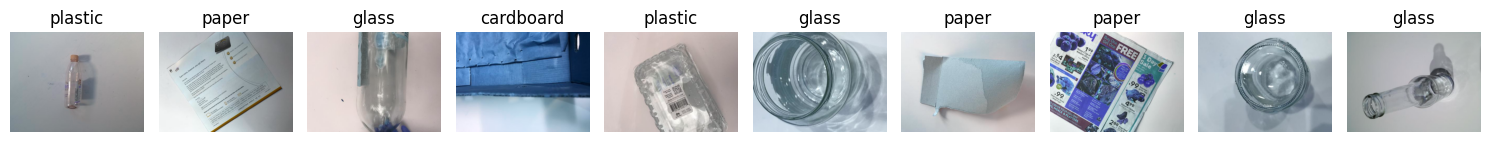

In [6]:
def plot_images_from_df(df, num_images=3):
    # Set up the matplotlib figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # Loop through the number of images you want to display
    for i in range(num_images):
        # Read the image from the path
        image_path = df.iloc[i]['imgPath']
        label = df.iloc[i]['label']

        # Load image using OpenCV and convert from BGR to RGB for matplotlib
        image = cv2.imread(image_path)
        # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Plot the image on the corresponding subplot
        axes[i].imshow(image)
        axes[i].set_title(label)  # Set the title as the label
        axes[i].axis('off')       # Hide axis for a cleaner look

    plt.tight_layout()
    plt.show()

# Call the function to plot images
plot_images_from_df(df, num_images=10)  # Specify the number of images to plot

In [7]:
df_gaussian_blur = df.copy()

In [9]:
# Function to apply Gaussian blur and update DataFrame with new image paths
def apply_gaussian_blur_to_paths(df, save_path):
    for idx, row in df.iterrows():
        # Read the original image
        image_path = row['imgPath']
        # image = cv2.imread(image_path)

        # Apply Gaussian Blur
        # blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

        # Save the blurred image to a new file
        filename = os.path.basename(image_path)
        blurred_image_path = os.path.join(save_path, f"blurred_{filename}")
        # cv2.imwrite(blurred_image_path, blurred_image)

        # Update the DataFrame with the new image path
        df.at[idx, 'imgPath'] = blurred_image_path

# Example: Update DataFrame with blurred images saved to a new folder
apply_gaussian_blur_to_paths(df_gaussian_blur, save_path='Gaussian_Blured')  # Replace with your save path
# apply_gaussian_blur_to_paths(df_gaussian_blur, save_path='/content/drive/MyDrive/Gaussian_Blured')  # Replace with your save path

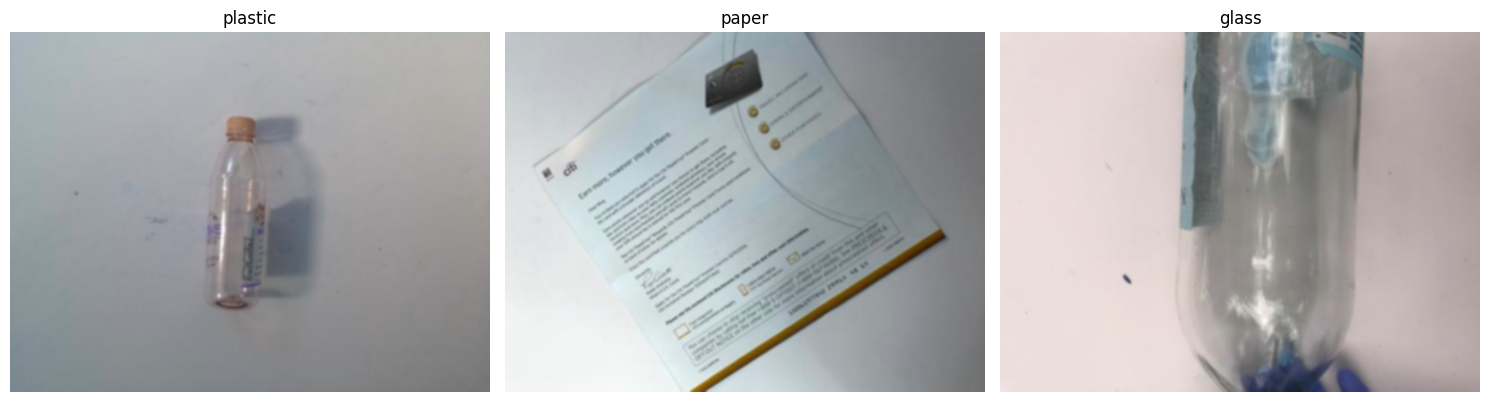

In [10]:
plot_images_from_df(df_gaussian_blur,3)

In [11]:
df_edges = df_gaussian_blur.copy()

In [12]:
# Function to apply Edge Detection and update DataFrame with new image paths
def apply_edge_detection_to_paths(df, save_path):
    for idx, row in df.iterrows():
        # Read the original image
        image_path = row['imgPath']
        # image = cv2.imread(image_path)

        # Apply Gaussian Blur
        # edges = cv2.Canny(image, 100, 200)

        # Save the blurred image to a new file
        filename = os.path.basename(image_path)
        edges_image_path = os.path.join(save_path, f"edges_{filename}")
        # cv2.imwrite(edges_image_path, edges)

        # Update the DataFrame with the new image path
        df.at[idx, 'imgPath'] = edges_image_path

# Example: Update DataFrame with blurred images saved to a new folder
apply_edge_detection_to_paths(df_edges, save_path='edges')  # Replace with your save path
# apply_edge_detection_to_paths(df_edges, save_path='/content/drive/MyDrive/edges')  # Replace with your save path

In [15]:
df_gaussian_blur

,imgPath,label
0,/content/drive/MyDrive/Gaussian_Blured/blurred...,plastic
1,/content/drive/MyDrive/Gaussian_Blured/blurred...,paper
2,/content/drive/MyDrive/Gaussian_Blured/blurred...,glass
3,/content/drive/MyDrive/Gaussian_Blured/blurred...,cardboard
4,/content/drive/MyDrive/Gaussian_Blured/blurred...,plastic
...,...,...
2522,/content/drive/MyDrive/Gaussian_Blured/blurred...,cardboard
2523,/content/drive/MyDrive/Gaussian_Blured/blurred...,paper
2524,/content/drive/MyDrive/Gaussian_Blured/blurred...,plastic
2525,/content/drive/MyDrive/Gaussian_Blured/blurred...,glass


In [16]:
df_edges


,imgPath,label
0,/content/drive/MyDrive/edges/edges_blurred_pla...,plastic
1,/content/drive/MyDrive/edges/edges_blurred_pap...,paper
2,/content/drive/MyDrive/edges/edges_blurred_gla...,glass
3,/content/drive/MyDrive/edges/edges_blurred_car...,cardboard
4,/content/drive/MyDrive/edges/edges_blurred_pla...,plastic
...,...,...
2522,/content/drive/MyDrive/edges/edges_blurred_car...,cardboard
2523,/content/drive/MyDrive/edges/edges_blurred_pap...,paper
2524,/content/drive/MyDrive/edges/edges_blurred_pla...,plastic
2525,/content/drive/MyDrive/edges/edges_blurred_gla...,glass


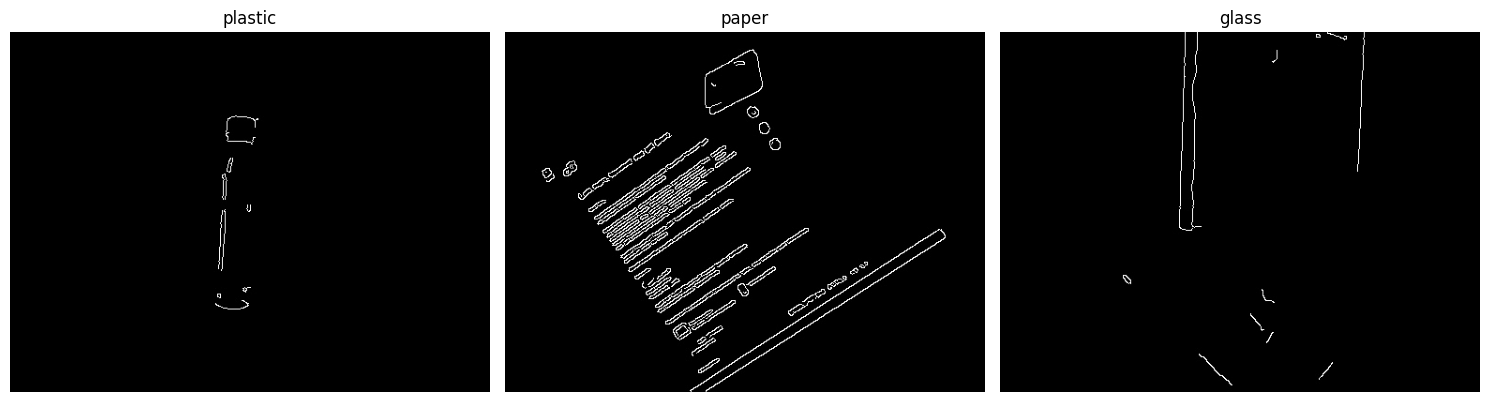

In [18]:
plot_images_from_df(df_edges,3)

In [ ]:
df.to_csv("Original.csv")
df_gaussian_blur.to_csv("Gaussian.csv")
df_edges.to_csv("Edges.csv")

In [21]:
def preprocess_images_and_labels(df, target_size=(224, 224), classes=None):
    # If no classes list is provided, extract unique labels from the DataFrame
    if classes is None:
        classes = df['label'].unique().tolist()

    preprocessed_images = []
    preprocessed_labels = []

    for _, row in df.iterrows():
        img_path = row['imgPath']
        label = row['label']

        # Step 1: Load the image using OpenCV
        img = cv2.imread(img_path)

        # Step 2: Resize the image to the target size
        img_resized = cv2.resize(img, target_size)

        # Step 3: Normalize the image pixel values to [0, 1]
        img_normalized = img_resized / 255.0

        # Append the preprocessed image to the list
        preprocessed_images.append(img_normalized)

        # Step 4: One-hot encode the label
        label_one_hot = np.zeros(len(classes))
        label_one_hot[classes.index(label)] = 1

        # Append the one-hot encoded label to the list
        preprocessed_labels.append(label_one_hot)

    # Convert lists to NumPy arrays
    preprocessed_images = np.array(preprocessed_images)
    preprocessed_labels = np.array(preprocessed_labels)

    return preprocessed_images, preprocessed_labels

# Example usage with your DataFrame (df containing imgPath and label columns):
target_size = (224, 224)
classes = df['label'].unique().tolist()  # Get unique classes from the 'label' column

# Preprocess images and labels
preprocessed_images, preprocessed_labels = preprocess_images_and_labels(df_edges, target_size=target_size, classes=classes)

# Check the results
print(preprocessed_images.shape)
print(preprocessed_labels.shape)

(2527, 224, 224, 3)
(2527, 6)


In [22]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(preprocessed_images, preprocessed_labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Validation data shape: {X_val.shape}")

Training data shape: (2021, 224, 224, 3), Validation data shape: (506, 224, 224, 3)
